In this file, the goal is to plot the histogram of Reconstruction errors and the UMAP for the Right Central sulcus of subjects in ABCD, HCP and epilepsy_PBS after implementing a betaVAE

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap.umap_ as umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load files

Embeddings_ABCD= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/Embeddings.csv")
Embeddings_HCP= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/hcp/Embeddings.csv")
Embeddings_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/epilepsy_PBS/Embeddings.csv")

Reconstruc_error_ABCD = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/Reconstruction_error.csv")
Reconstruc_error_HCP = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/hcp/Reconstruction_error.csv")
Reconstruc_error_epilepsy= pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-10-30/11-29-00/epilepsy_PBS/Reconstruction_error.csv")

In [3]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [4]:
Participants_epilepsy

,Index,Diagnosis
0,control01,controls
1,control02,controls
2,control03,controls
3,control04,controls
4,control05,controls
5,control06,controls
6,control07,controls
7,control08,controls
8,control09,controls
9,control10,controls


In [5]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]
epilepsy_irm_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_irm_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]

In [6]:
epilepsy_irm_pos

,Index,Diagnosis
32,sujet02_pos,irm_positives_centrales
33,sujet03_pos,irm_positives_centrales
34,sujet04_pos,irm_positives_centrales
35,sujet05_pos,irm_positives_centrales
36,sujet06_pos,irm_positives_centrales
37,sujet07_pos,irm_positives_centrales
38,sujet08_pos,irm_positives_centrales
39,sujet09_pos,irm_positives_centrales
40,sujet10_pos,irm_positives_centrales
41,sujet11_pos,irm_positives_centrales


In [7]:
#We rename the first colomn 

Reconstruc_error_epilepsy  = Reconstruc_error_epilepsy.rename(columns={Reconstruc_error_epilepsy.columns[0]: "Index"})
Embeddings_epilepsy  = Embeddings_epilepsy.rename(columns={Embeddings_epilepsy.columns[0]: "Index"})


In [8]:
#From epilepsy, we separate controls, irm_negatives and irm_positives 

Reconstruc_error_controls = Reconstruc_error_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Reconstruc_error_irm_negatives = Reconstruc_error_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Reconstruc_error_irm_positives = Reconstruc_error_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

Embeddings_controls = Embeddings_epilepsy.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
Embeddings_irm_negatives = Embeddings_epilepsy.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
Embeddings_irm_positives = Embeddings_epilepsy.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [9]:
epilepsy_controls

,Index,Diagnosis
0,control01,controls
1,control02,controls
2,control03,controls
3,control04,controls
4,control05,controls
5,control06,controls
6,control07,controls
7,control08,controls
8,control09,controls
9,control10,controls


In [10]:
Reconstruc_error_irm_negatives

,Index,0
0,sujet01_neg,4160.895508
1,sujet03_neg,3777.039307
2,sujet07_neg,4308.268555
3,sujet08_neg,5012.127930
4,sujet10_neg,4925.831055
5,sujet12_neg,4746.332031
6,sujet13_neg,5568.946289
7,sujet15_neg,4236.041992
8,sujet16_neg,4614.904297
9,sujet20_neg,5101.715820


$\textbf{ Histogramme des erreurs de reconstruction}$

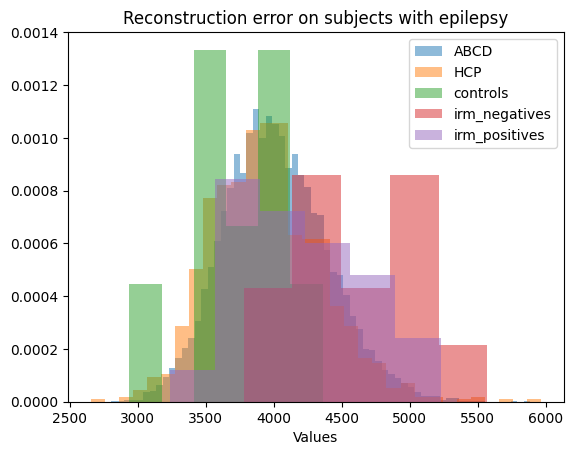

In [11]:
plt.hist(Reconstruc_error_ABCD.iloc[:,1], bins="auto", alpha=0.5, label="ABCD", density=True)
plt.hist(Reconstruc_error_HCP.iloc[:,1], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(Reconstruc_error_controls.iloc[:,1], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(Reconstruc_error_irm_negatives.iloc[:,1], bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(Reconstruc_error_irm_positives.iloc[:,1], bins="auto", alpha=0.5, label="irm_positives", density=True)

plt.xlabel("Values")

plt.title("Reconstruction error on subjects with epilepsy")
plt.legend()
plt.show()

$\textbf{UMAP}$

In [12]:
X1 = Embeddings_ABCD.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_HCP.iloc[:,1:76]
X3= Embeddings_controls.iloc[:,1:76]
X4= Embeddings_irm_negatives.iloc[:,1:76]
X5= Embeddings_irm_positives.iloc[:,1:76]


In [15]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X1)
X1_umap = reducer.transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)
X5_umap=reducer.transform(X5)

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


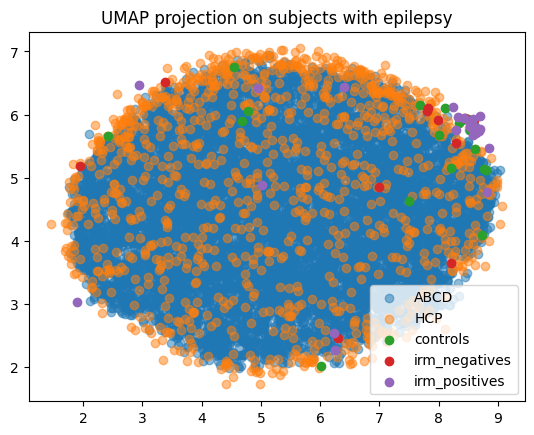

In [16]:
plt.scatter(X1_umap[:,0], X1_umap[:,1], label="ABCD", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="controls")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="irm_negatives")
plt.scatter(X5_umap[:,0], X5_umap[:,1], label="irm_positives")

plt.title("UMAP projection on subjects with epilepsy")
plt.legend()
plt.show()

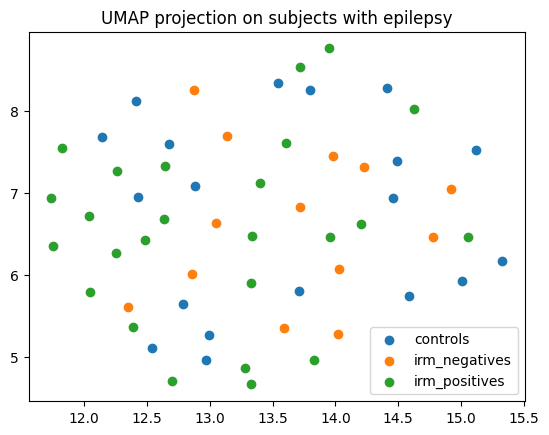

In [17]:
X=np.concatenate([X3,X4,X5], axis=0)
X_umap = reducer.fit_transform(X)

plt.scatter(X_umap[:len(X3),0], X_umap[:len(X3),1], label="controls")
plt.scatter(X_umap[len(X3):len(X3)+len(X4),0], X_umap[len(X3):len(X3)+len(X4),1], label="irm_negatives")
plt.scatter(X_umap[len(X3)+len(X4):,0], X_umap[len(X3)+len(X4):,1], label="irm_positives")

plt.title("UMAP projection on subjects with epilepsy")
plt.legend()
plt.show()

Boxplots of reconstruction errors

In [18]:
Reconstruc_error_ABCD= Reconstruc_error_ABCD.iloc[:,1]
Reconstruc_error_HCP= Reconstruc_error_HCP.iloc[:,1]
Reconstruc_error_controls= Reconstruc_error_controls.iloc[:,1]
Reconstruc_error_irm_negatives= Reconstruc_error_irm_negatives.iloc[:,1]
Reconstruc_error_irm_positives= Reconstruc_error_irm_positives.iloc[:,1]

In [19]:
Reconstruc_error_ABCD= pd.DataFrame({
    'database': 'ABCD',
    'Reconstruc_error': Reconstruc_error_ABCD
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': Reconstruc_error_HCP
})

Reconstruc_error_controls=pd.DataFrame({
    'database': 'controls',
    'Reconstruc_error': Reconstruc_error_controls
})

Reconstruc_error_irm_negatives=pd.DataFrame({
    'database': 'irm_negatives',
    'Reconstruc_error': Reconstruc_error_irm_negatives
})

Reconstruc_error_irm_positives=pd.DataFrame({
    'database': 'irm_positives',
    'Reconstruc_error': Reconstruc_error_irm_positives
})


In [20]:
Reconstruct_error= pd.concat([Reconstruc_error_ABCD,Reconstruc_error_HCP,Reconstruc_error_controls,Reconstruc_error_irm_negatives, Reconstruc_error_irm_positives ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HCP vs. controls: Mann-Whitney-Wilcoxon test two-sided, P_val:2.130e-02 U_stat=1.384e+04
controls vs. irm_negatives: Mann-Whitney-Wilcoxon test two-sided, P_val:3.415e-05 U_stat=1.500e+01
irm_negatives vs. irm_positives: Mann-Whitney-Wilcoxon test two-sided, P_val:2.673e-02 U_stat=2.350e+02
HCP vs. irm_negatives: Mann-Whitney-Wilcoxon test two-sided, P_val:1.041e-05 U_stat=2.097e+03
controls vs. irm_positives: Mann-Whitney-Wilcoxon test two-sided, P_val:1.625e-03 U_stat=1.040e+02
HCP vs. irm_positives: Mann-Whitney-Wilcoxon test two-sided, P_val:9.366e-03 U_stat=9.698e+03


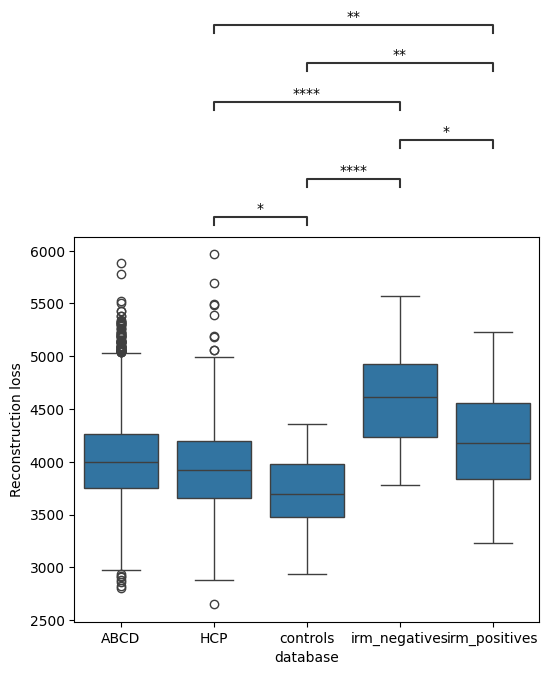

In [21]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("HCP", "controls"), ("HCP", "irm_negatives"), ("HCP", "irm_positives"), ("controls", "irm_negatives"), ("controls", "irm_positives"), ("irm_negatives", "irm_positives")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()